In [1]:
import pandas
import px4tools
import pylab as pl
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Data Sets

In [2]:
data_bench = px4tools.process_data(pandas.read_csv('log/06-07-15/17_12_43.csv'))

In [3]:
data_flight = px4tools.process_data(pandas.read_csv('log/06-06-15/17_02_13.csv'))

In [4]:
px4tools.statistics(data_bench[100:150], [
        'GPS_VelN', 'GPS_VelE', 'GPS_VelD',
        'GPS_X', 'GPS_Y', 'GPS_Z', 'DIST_Distance',
                        'IMU1_AccX', 'IMU1_AccY', 'IMU1_AccZ', 'SENS_BaroAlt'], plot=False)

{'DIST_Distance_dt': 0.053275678418803415,
 'DIST_Distance_mean': 3.0332232081397223,
 'DIST_Distance_noise_power': 0.0012626710908802876,
 'DIST_Distance_stddev': 0.0082018082754023152,
 'GPS_VelD_dt': 0.20579804979253105,
 'GPS_VelD_mean': 0.020702479076239004,
 'GPS_VelD_noise_power': 0.27275217870526308,
 'GPS_VelD_stddev': 0.23692164623395445,
 'GPS_VelE_dt': 0.202438081632653,
 'GPS_VelE_mean': -0.0098780491351550346,
 'GPS_VelE_noise_power': 0.37465112622541724,
 'GPS_VelE_stddev': 0.27539726809572096,
 'GPS_VelN_dt': 0.2049476446280991,
 'GPS_VelN_mean': 0.009835391056296789,
 'GPS_VelN_noise_power': 0.21646715570250252,
 'GPS_VelN_stddev': 0.21062866305555825,
 'GPS_X_dt': 0.202438081632653,
 'GPS_X_mean': 3.0070232049245842,
 'GPS_X_noise_power': 1.3529051283661417,
 'GPS_X_stddev': 0.52333499674436057,
 'GPS_Y_dt': 0.202438081632653,
 'GPS_Y_mean': 2.3338230776494022,
 'GPS_Y_noise_power': 0.76922605419646195,
 'GPS_Y_stddev': 0.39461455466491213,
 'GPS_Z_dt': 0.199186064257

In [5]:
px4tools.statistics(data_flight[200:400], [
        'GPS_VelN', 'GPS_VelE', 'GPS_VelD',
        'GPS_X', 'GPS_Y', 'GPS_Z', 'DIST_Distance',
                        'IMU1_AccX', 'IMU1_AccY', 'IMU1_AccZ', 'SENS_BaroAlt'])

{'DIST_Distance_dt': 0.052752767220902615,
 'DIST_Distance_mean': 2.0665512850857386,
 'DIST_Distance_noise_power': 2.3455564772059976,
 'DIST_Distance_stddev': 0.35175928537215384,
 'GPS_VelD_dt': 0.20453549795081968,
 'GPS_VelD_mean': -0.038607982472508379,
 'GPS_VelD_noise_power': 0.35833544674225903,
 'GPS_VelD_stddev': 0.27072554189225917,
 'GPS_VelE_dt': 0.20643913753877977,
 'GPS_VelE_mean': 0.0031611564557556607,
 'GPS_VelE_noise_power': 0.28700138705647504,
 'GPS_VelE_stddev': 0.24340977551522497,
 'GPS_VelN_dt': 0.20558871884654997,
 'GPS_VelN_mean': 0.018960904945154983,
 'GPS_VelN_noise_power': 0.22974712661907559,
 'GPS_VelN_stddev': 0.21733250428845624,
 'GPS_X_dt': 0.20225597365754816,
 'GPS_X_mean': 0.36071433013052751,
 'GPS_X_noise_power': 0.95019256415321518,
 'GPS_X_stddev': 0.43838581435189122,
 'GPS_Y_dt': 0.20225597365754816,
 'GPS_Y_mean': 2.7372938268778517,
 'GPS_Y_noise_power': 1.9610127135956659,
 'GPS_Y_stddev': 0.62978292747828757,
 'GPS_Z_dt': 0.200026699

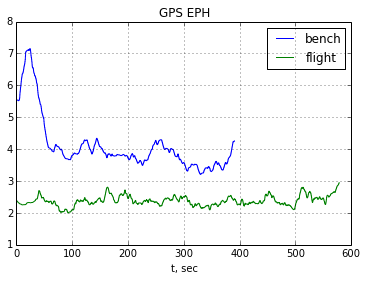

In [6]:
data_bench.GPS_EPH.plot('bench')
data_flight.GPS_EPH.plot('flight')
pl.legend()
pl.title('GPS EPH')

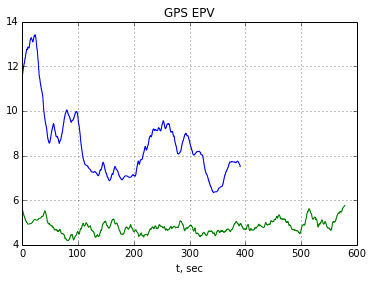

In [7]:
data_bench.GPS_EPV.plot('bench')
data_flight.GPS_EPV.plot('flight')
pl.title('GPS EPV')

In [10]:
px4tools.find_lpe_gains(data_bench[100:150], printing=True);

LPE_BAR_Z	=	0.255
LPE_GPS_XY	=	0.523
LPE_ACC_Z	=	0.175
LPE_GPS_VXY	=	0.275
LPE_ACC_XY	=	0.135
LPE_LDR_Z	=	0.008
LPE_GPS_Z	=	3.547
LPE_GPS_VZ	=	0.237


In [11]:
px4tools.find_lpe_gains(data_flight[100:150], printing=True);

LPE_BAR_Z	=	0.285
LPE_GPS_XY	=	0.894
LPE_ACC_Z	=	3.429
LPE_GPS_VXY	=	0.233
LPE_ACC_XY	=	0.946
LPE_LDR_Z	=	0.132
LPE_GPS_Z	=	1.653
LPE_GPS_VZ	=	0.294


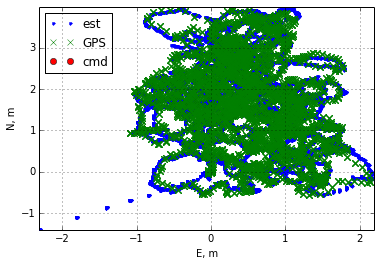

In [12]:
px4tools.pos_analysis(data_flight);

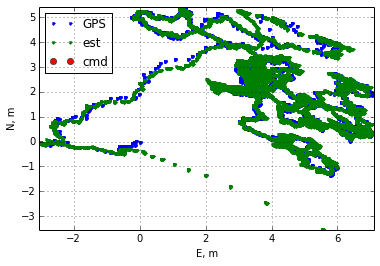

In [24]:
px4_analysis.pos_analysis(data_bench);